In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-04-18 20:53:00,750] INFO in core: Started 


2019-10-17


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
M1,93.0,-0.103478,0.820886,-3.100046,-0.236882,0.135346,0.259399,1.420294,1.034130,-9.037882,23.204686,-1.782040
CSI 300,93.0,-0.024390,0.901759,-3.009172,-0.323002,0.240764,0.548002,1.403792,1.029090,-2.717346,20.174870,-1.415627
S&P 500,93.0,-0.099275,1.157183,-3.782368,-0.287416,0.160323,0.325579,3.152724,0.737226,-7.748624,33.717264,-0.730270
IRA,93.0,0.008607,2.133866,-7.145016,-0.037708,0.319927,0.678110,5.842441,0.450351,0.894998,46.663362,-1.215407


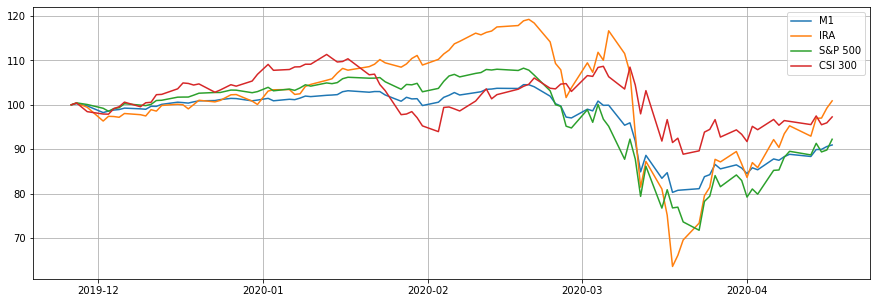

In [3]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

2020-03-19


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
M1,20.0,0.605504,1.324705,-1.459985,-0.387495,0.464993,1.177503,3.340016,1.176024,12.647760,2.397245,0.572361
IRA,20.0,2.197991,3.629142,-3.499969,-0.819983,2.339988,4.557498,8.450005,0.868076,52.631626,6.520427,0.056896
CSI 300,20.0,0.278247,2.302304,-4.065648,-1.138019,0.553049,1.821645,4.706356,0.534520,5.185185,5.110030,-0.128610
S&P 500,20.0,0.973138,3.657628,-4.500487,-1.649106,0.989724,3.023858,9.060326,0.526439,19.880900,6.756053,0.467340


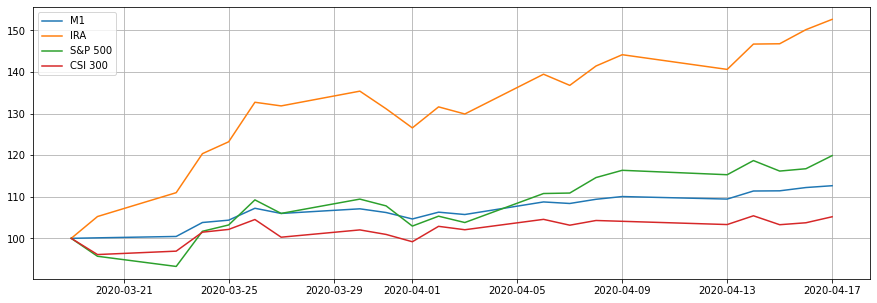

In [5]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 21)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 21)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 1)

In [ ]:
ret = frame.rolling(1).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))